In [ ]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd

def load_scalar_data_tf(event_file_path, tag_name):
    """Loads scalar data using TensorFlow's summary_iterator."""
    steps = []
    values = []

    for summary in summary_iterator(event_file_path):
        for v in summary.summary.value:
            if v.tag == tag_name:
                steps.append(summary.step)
                values.append(v.simple_value)
    if not steps:
        print(f"Warning: Tag '{tag_name}' not found or no data for it in {event_file_path}")
    return pd.DataFrame({'step': steps, 'value': values})


baseline_event_file_path = './HalfCheetah_baseline_5_per_llm/events.out.tfevents.1747371553.agc01.2991497.0'
ours_event_file_path = './HalfCheetah_ours_30_per_llm/events.out.tfevents.1746951295.agc08.3774271.0'
tag_name = 'charts/episodic_return'

baseline_data = load_scalar_data_tf(baseline_event_file_path, tag_name)

ours_data = load_scalar_data_tf(ours_event_file_path, tag_name)


2025-05-18 14:14:27.351099: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 14:14:28.253734: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 14:14:28.256558: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 14:14:33.340908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


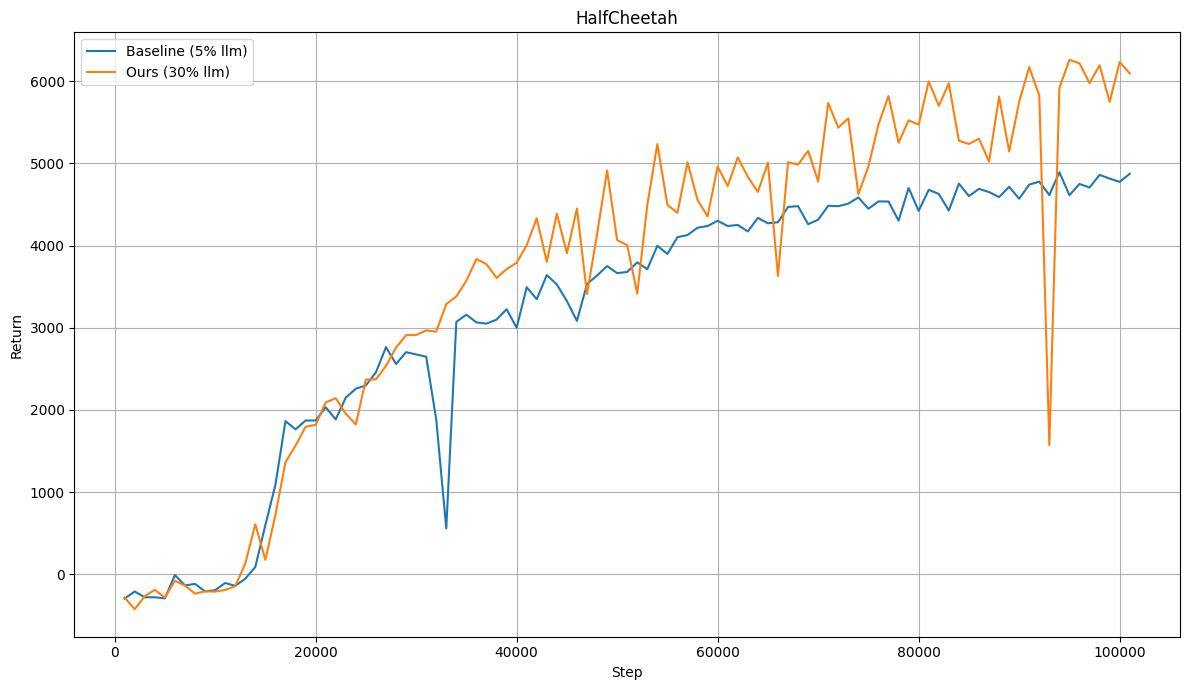

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.plot(baseline_data['step'], baseline_data['value'], label='Baseline (5% llm)')

plt.plot(ours_data['step'], ours_data['value'], label='Ours (30% llm)')

plt.xlabel('Step')
plt.ylabel("Return")
plt.title('HalfCheetah')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()